In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df_crime=pd.read_csv("C:/Users/vineela/Desktop/IBM/crime in india.csv")

In [3]:
df_crime

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937
...,...,...,...,...,...,...,...,...
2444,Tamil Nadu,2010,Total Property,7. Total Property Stolen & Recovered,16125,21509,660311804,1317919190
2445,Tripura,2010,Total Property,7. Total Property Stolen & Recovered,192,879,5666102,33032746
2446,Uttar Pradesh,2010,Total Property,7. Total Property Stolen & Recovered,9130,35068,577591772,1442670414
2447,Uttarakhand,2010,Total Property,7. Total Property Stolen & Recovered,964,2234,47135685,123398840


In [32]:
df_crime.nunique()

Area_Name                        35
Year                             10
Group_Name                        7
Sub_Group_Name                    7
Cases_Property_Recovered       1035
Cases_Property_Stolen          1351
Value_of_Property_Recovered    2204
Value_of_Property_Stolen       2321
dtype: int64

In [4]:
df_crime.dtypes

Area_Name                      object
Year                            int64
Group_Name                     object
Sub_Group_Name                 object
Cases_Property_Recovered        int64
Cases_Property_Stolen           int64
Value_of_Property_Recovered     int64
Value_of_Property_Stolen        int64
dtype: object

In [5]:
df_crime.keys()

Index(['Area_Name', 'Year', 'Group_Name', 'Sub_Group_Name',
       'Cases_Property_Recovered', 'Cases_Property_Stolen',
       'Value_of_Property_Recovered', 'Value_of_Property_Stolen'],
      dtype='object')

In [6]:
df_crime.isnull().sum()

Area_Name                      0
Year                           0
Group_Name                     0
Sub_Group_Name                 0
Cases_Property_Recovered       0
Cases_Property_Stolen          0
Value_of_Property_Recovered    0
Value_of_Property_Stolen       0
dtype: int64

In [8]:
df_crime.shape

(2449, 8)

In [9]:
df_crime.corr()

,Year,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
Year,1.000000,0.022467,0.028893,0.099033,0.100732
Cases_Property_Recovered,0.022467,1.000000,0.935765,0.495588,0.579084
Cases_Property_Stolen,0.028893,0.935765,1.000000,0.508971,0.643448
Value_of_Property_Recovered,0.099033,0.495588,0.508971,1.000000,0.580554
Value_of_Property_Stolen,0.100732,0.579084,0.643448,0.580554,1.000000


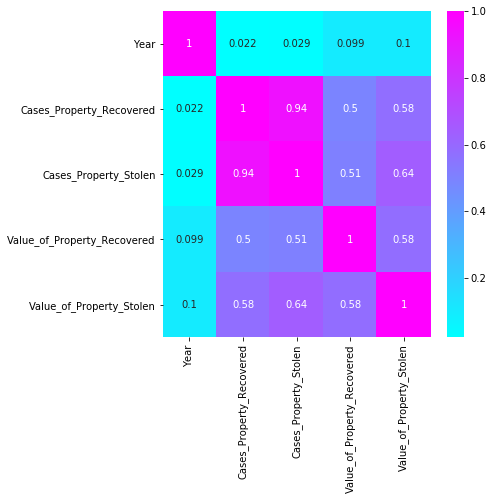

In [30]:
cor=df_crime.corr()
plt.figure(figsize=(6,6))
sns.heatmap(cor,annot=True,cmap='cool')
plt.show()

In [10]:
df_crime.describe()

,Year,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
count,2449.000000,2449.000000,2449.000000,2.449000e+03,2.449000e+03
mean,2005.499388,1232.892201,3419.420988,5.859924e+07,2.465431e+08
std,2.873294,3079.573907,8136.256820,2.494403e+08,9.670035e+08
min,2001.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2003.000000,13.000000,45.000000,6.845700e+05,3.649018e+06
50%,2005.000000,113.000000,358.000000,5.851830e+06,2.701800e+07
75%,2008.000000,722.000000,1875.000000,3.406395e+07,1.214580e+08
max,2010.000000,27960.000000,80663.000000,7.470011e+09,2.377625e+10


In [12]:
df_crime.skew()

Year                            0.000582
Cases_Property_Recovered        4.180588
Cases_Property_Stolen           4.123731
Value_of_Property_Recovered    20.650682
Value_of_Property_Stolen       11.875169
dtype: float64

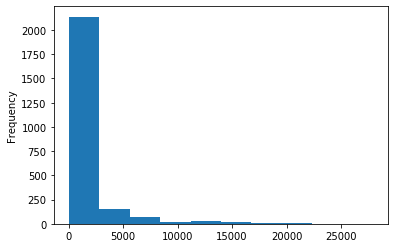

In [13]:
df_crime['Cases_Property_Recovered'].plot.hist()

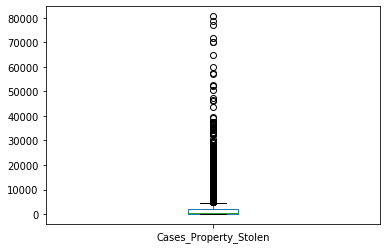

In [16]:
df_crime['Cases_Property_Stolen'].plot.box()

Year                              AxesSubplot(0.125,0.125;0.133621x0.755)
Cases_Property_Recovered       AxesSubplot(0.285345,0.125;0.133621x0.755)
Cases_Property_Stolen           AxesSubplot(0.44569,0.125;0.133621x0.755)
Value_of_Property_Recovered    AxesSubplot(0.606034,0.125;0.133621x0.755)
Value_of_Property_Stolen       AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

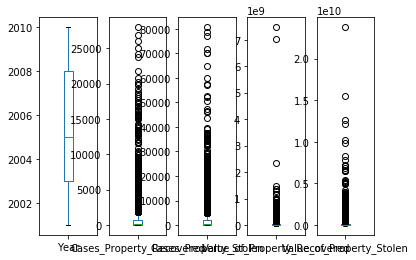

In [15]:
df_crime.plot(kind='box',subplots=True)

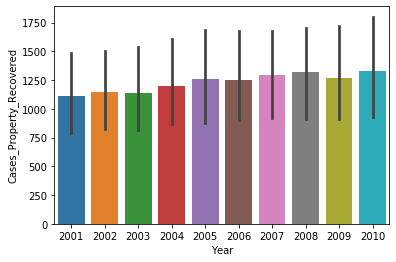

In [18]:
sns.barplot(x='Year',y='Cases_Property_Recovered',data=df_crime)
plt.show()

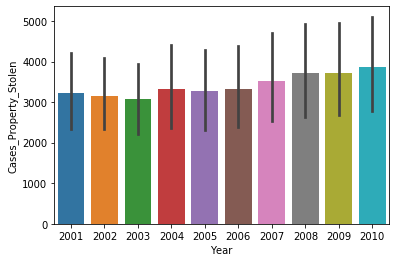

In [19]:
sns.barplot(x='Year',y='Cases_Property_Stolen',data=df_crime)
plt.show()

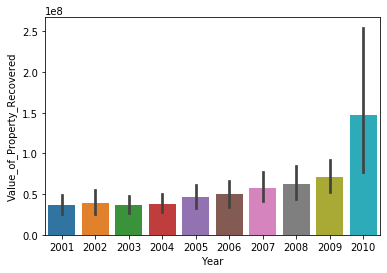

In [20]:
sns.barplot(x='Year',y='Value_of_Property_Recovered',data=df_crime)
plt.show()

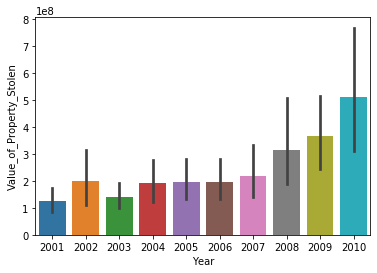

In [23]:
sns.barplot(x='Year',y='Value_of_Property_Stolen',data=df_crime)
plt.show()

In [25]:
df_crime.skew()

Year                            0.000582
Cases_Property_Recovered        4.180588
Cases_Property_Stolen           4.123731
Value_of_Property_Recovered    20.650682
Value_of_Property_Stolen       11.875169
dtype: float64

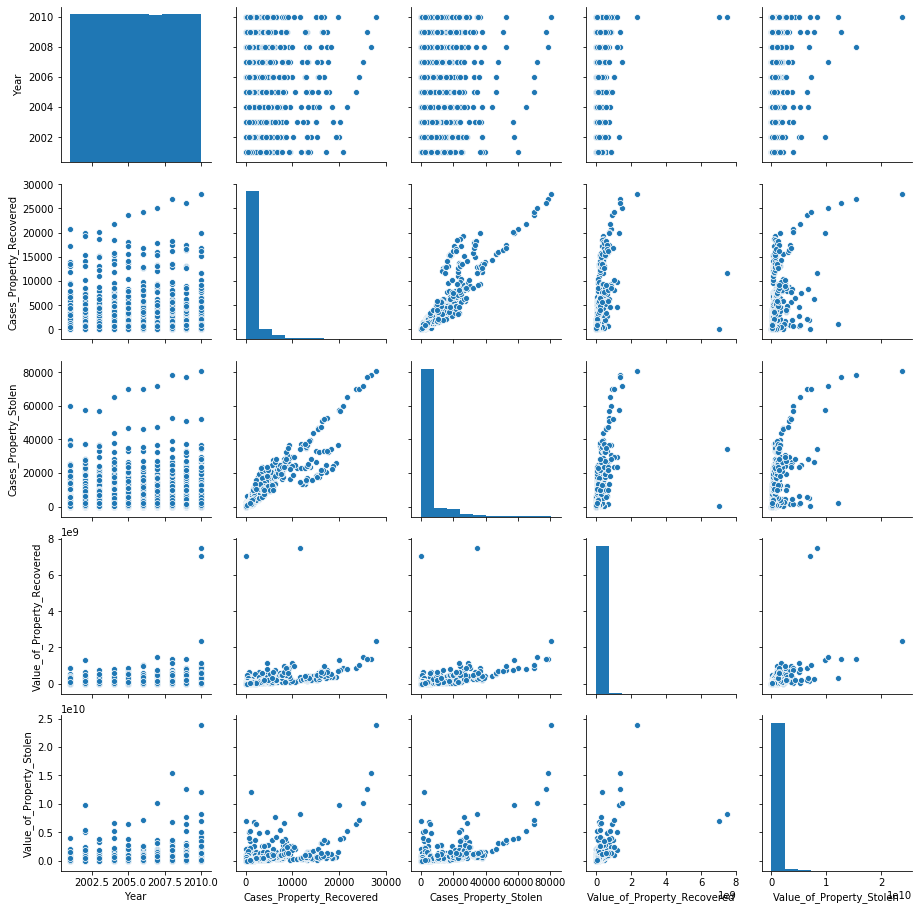

In [26]:
sns.pairplot(df_crime)

In [33]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values
df_crime['Area_Name'] = labelencoder.fit_transform(df_crime['Area_Name'])
df_crime

,Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,0,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
1,1,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
2,2,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
3,3,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
4,4,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937
...,...,...,...,...,...,...,...,...
2444,30,2010,Total Property,7. Total Property Stolen & Recovered,16125,21509,660311804,1317919190
2445,31,2010,Total Property,7. Total Property Stolen & Recovered,192,879,5666102,33032746
2446,32,2010,Total Property,7. Total Property Stolen & Recovered,9130,35068,577591772,1442670414
2447,33,2010,Total Property,7. Total Property Stolen & Recovered,964,2234,47135685,123398840


In [34]:
df_crime.drop(['Group_Name','Sub_Group_Name','Year'],axis=1,inplace=True)

In [35]:
#removing outliers
from scipy.stats import zscore
z_score=abs(zscore(df_crime))
print(df_crime.shape)
df_crime.final=df_crime.loc[(zscore<3).all(axis=1)]
print(df_crime.final)

(2449, 5)


TypeError: '<' not supported between instances of 'function' and 'int'

In [36]:
x=df_crime.drop(columns=['Area_Name'])

In [37]:
x

,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
0,27,64,755858,1321961
1,3321,7134,51483437,147019348
2,66,248,825115,4931904
3,539,2423,3722850,21466955
4,367,3231,2327135,17023937
...,...,...,...,...
2444,16125,21509,660311804,1317919190
2445,192,879,5666102,33032746
2446,9130,35068,577591772,1442670414
2447,964,2234,47135685,123398840


In [38]:
y=df_crime['Area_Name']

In [39]:
y

0        0
1        1
2        2
3        3
4        4
        ..
2444    30
2445    31
2446    32
2447    33
2448    34
Name: Area_Name, Length: 2449, dtype: int32

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sc=scaler.fit_transform(x,y)

In [42]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=9)

In [43]:
print(x_train.shape,x_test.shape)

(1714, 4) (735, 4)


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print('r2_score corresponding to random_state:',r_state,"is:",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to', final_r_state,'is',max_r_score)


r2_score corresponding to random_state: 42 is: -0.020067572258201105
r2_score corresponding to random_state: 43 is: 0.0007794686090095704
r2_score corresponding to random_state: 44 is: 0.007864785039773614
r2_score corresponding to random_state: 45 is: -0.00237342552374864
r2_score corresponding to random_state: 46 is: 0.013356091443945117
r2_score corresponding to random_state: 47 is: -0.009282820931188818
r2_score corresponding to random_state: 48 is: 0.012932774757569598
r2_score corresponding to random_state: 49 is: 0.009712372692034399
r2_score corresponding to random_state: 50 is: -1.2051297156221241
r2_score corresponding to random_state: 51 is: 0.002139229010604482
r2_score corresponding to random_state: 52 is: 0.008415198224819509
r2_score corresponding to random_state: 53 is: 0.014674765406885393
r2_score corresponding to random_state: 54 is: -0.003813140095350054
r2_score corresponding to random_state: 55 is: 0.016269762358240847
r2_score corresponding to random_state: 56 is

In [67]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()

0.00042236923236769195

In [68]:
print('r2 scores:',r2_score(y_test,y_pred))
print('RMSE is :',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 scores: 0.004973916390044741
RMSE is : 10.136274677838431


In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,50)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 35}

In [70]:
knr=KNeighborsRegressor(n_neighbors=35)
r_state=maxr2_score(knr,x,y)

NameError: name 'maxr2_score' is not defined